In [2]:
#!pip install python-docx
##!pip install easyocr

In [11]:
import cv2
import easyocr
import matplotlib.pyplot as plt
import numpy as np
from docx import Document


In [18]:
def perform_ocr(image_path, doc):
    # Initialize the EasyOCR Reader
    reader = easyocr.Reader(['en'], gpu=False)  # Specify the languages you want to use

    # Read the image
    image = cv2.imread(image_path)

    # Perform OCR
    results = reader.readtext(image)

    # Print and store results in the document
    for (bbox, text, prob) in results:
        print(f'Detected Text: {text} (Confidence: {prob:.2f})')
        doc.add_paragraph(text)
        # doc.add_paragraph(f'Detected Text: {text} (Confidence: {prob:.2f})')

        # Draw bounding box around detected text
        (top_left, top_right, bottom_right, bottom_left) = bbox
        top_left = tuple(map(int, top_left))
        bottom_right = tuple(map(int, bottom_right))
        cv2.rectangle(image, top_left, bottom_right, (0, 255, 0), 2)

    # Display the image with detected text boxes
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.axis('off')  # Hide axes
    plt.show()

Using CPU. Note: This module is much faster with a GPU.


Detected Text: OLIVIA (Confidence: 1.00)
Detected Text: WILSON (Confidence: 0.72)
Detected Text: Account Manager (Confidence: 1.00)
Detected Text: +123-456-7890 (Confidence: 0.58)
Detected Text: hello@reallygreatsite.com (Confidence: 0.89)
Detected Text: 123 Anywhere (Confidence: 0.87)
Detected Text: City (Confidence: 0.78)
Detected Text: 14th August 2026 (Confidence: 0.99)
Detected Text: Helene Paquet (Confidence: 0.79)
Detected Text: Hiring Manager, Really Great Place (Confidence: 0.75)
Detected Text: +123-456-7890 (Confidence: 0.65)
Detected Text: hello@reallygreatsite.com (Confidence: 0.69)
Detected Text: 123 Anywhere St,, (Confidence: 0.62)
Detected Text: JOB REFERENCE: SENIOR ACCOUNT MANAGER (Confidence: 0.81)
Detected Text: Dear Helene, (Confidence: 0.98)
Detected Text: Lorem ipsum dolor sit amet, consectetur adipiscing elit, sed do eiusmod tempor (Confidence: 0.92)
Detected Text: incididunt ut labore et dolore magna aliqua: Ut enim ad minim veniam; (Confidence: 0.58)
Detected T

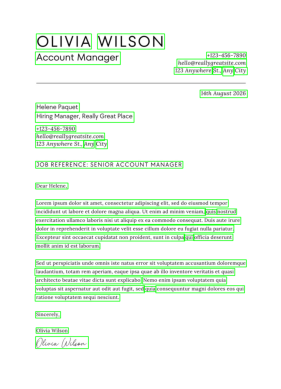

OCR results saved to OCR_Output.docx


In [19]:
def main():
    image_path = 'images/letter.png'  # Update this path to your image
    
    # Create a Word document
    doc = Document()
    doc.add_heading('OCR Results', 0)
    
    # Perform OCR and store results in the document
    perform_ocr(image_path, doc)
    
    # Save the document
    doc.save('OCR_Output.docx')
    print("OCR results saved to OCR_Output.docx")

if __name__ == '__main__':
    main()